# Demo

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('tableau')
import pandas as pd
from codex import Tableau

In [2]:
xlswb = '/home/pieter/projects/codex/data/template_incl_scenarios.xlsx'
tab = Tableau(xlswb, nsimuls=2001)

Reading data ...
tbl_deelnemer
tbl_assumptie
tbl_regeling
tbl_aanspraak
OK

Reading lookup tables ...
lookup_prijsinflatie
lookup_salarisstijging
lookup_indexatie
lookup_rente
lookup_lifecycle
lookup_rendement_aandelen
lookup_rendement_obligaties
lookup_tar_at_pensionage
lookup_nqx
lookup_tarief
OK


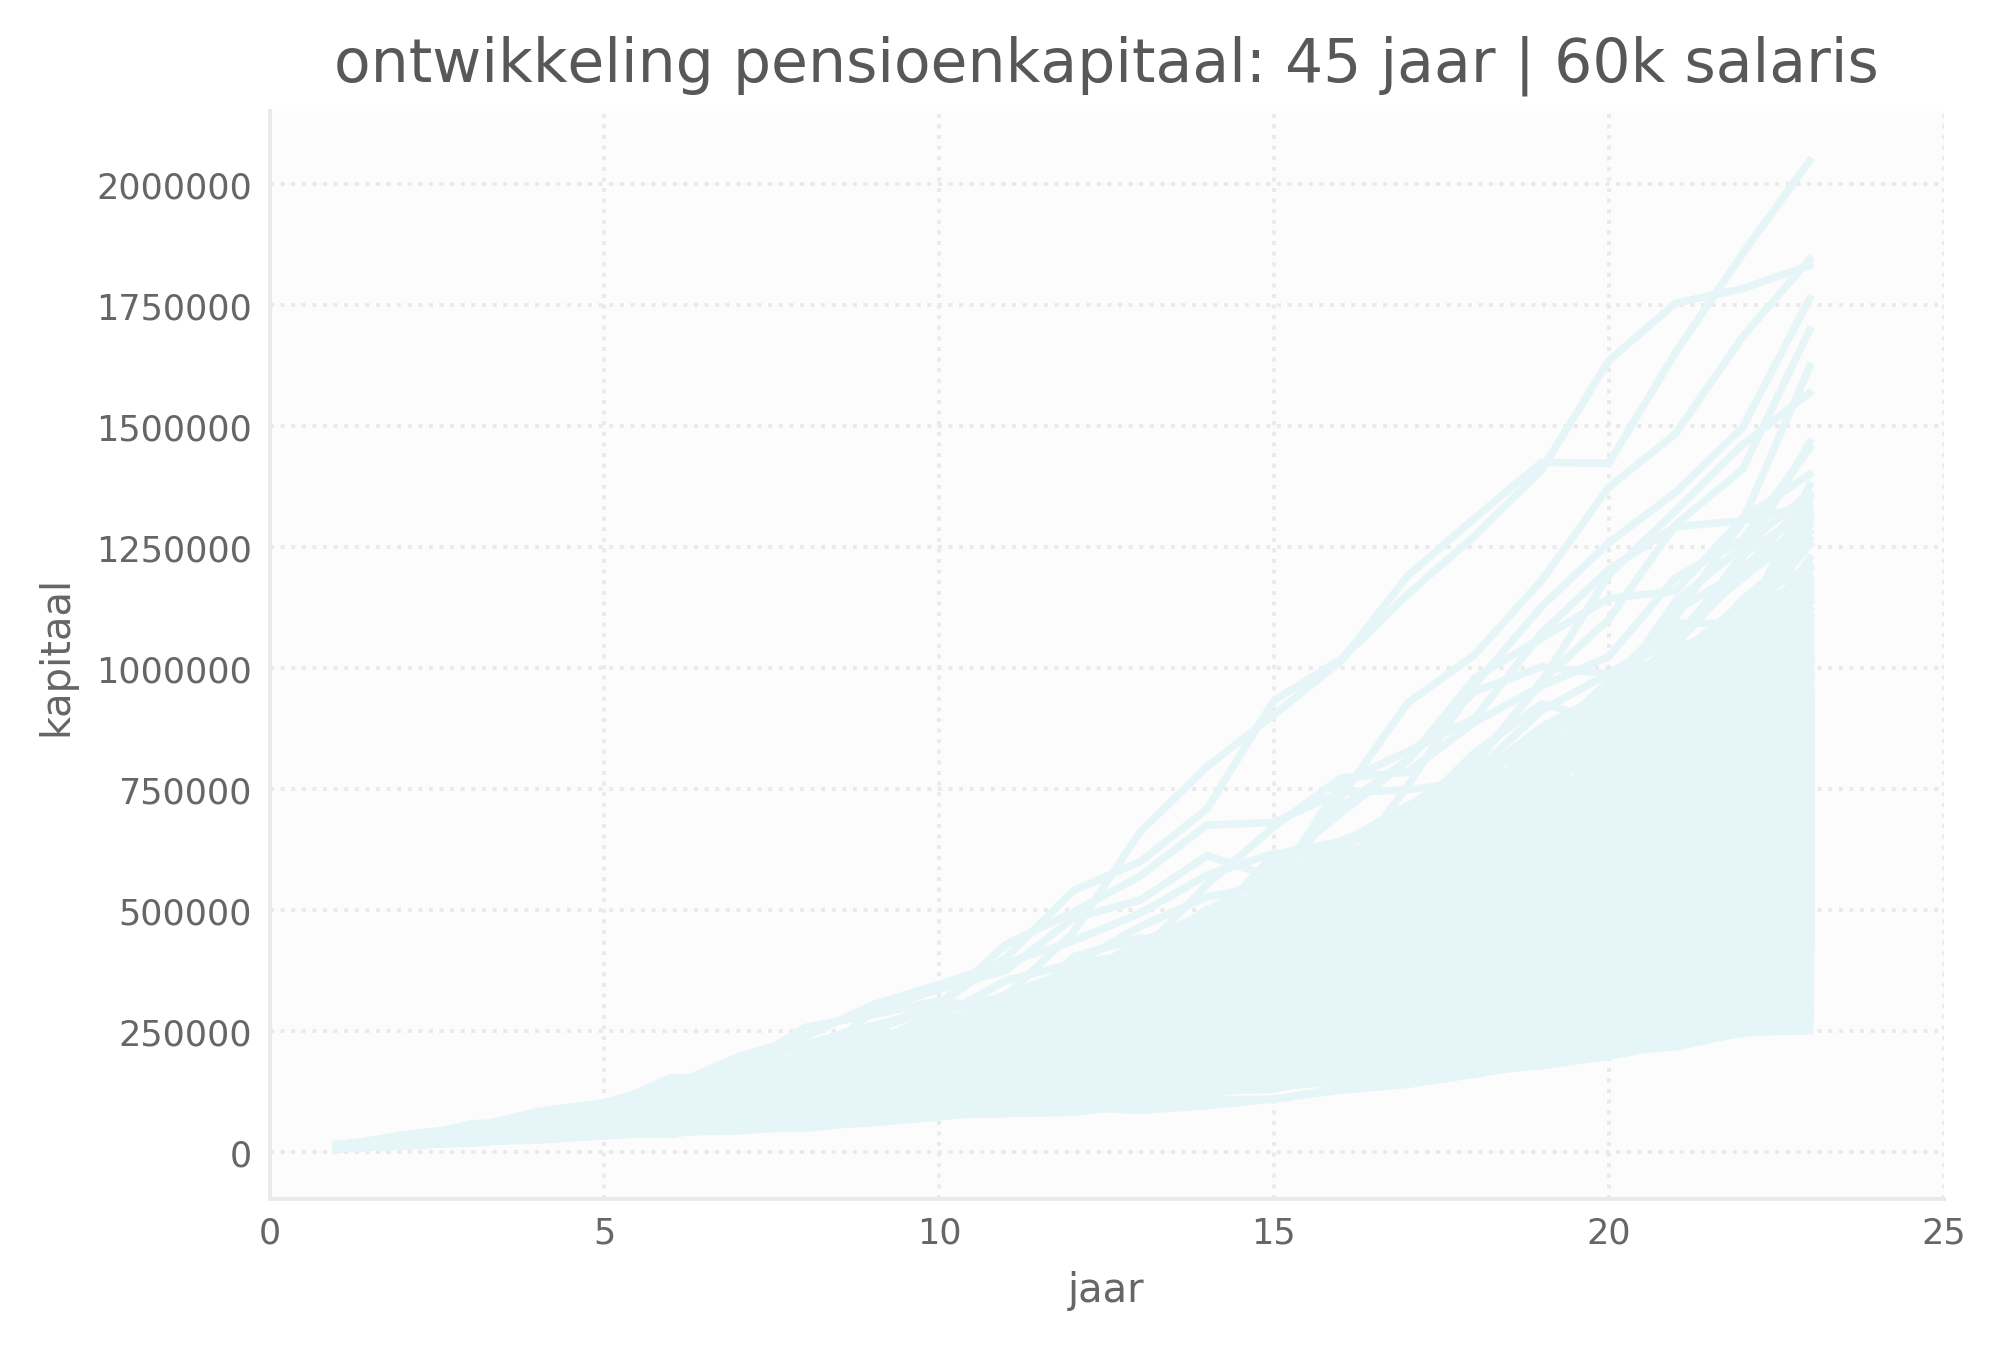

In [3]:
condition = ((tab.tableau.regeling_id == 3) &
             (tab.tableau.aanspraak == 'VARL') &
             (tab.tableau.id==5))
newtab = tab.tableau[condition]
newtab.shape
newtab.set_index(['BOY', 'simulnr'], inplace=True)
toplot = newtab['capital'].unstack()
fig, ax = plt.subplots()
fig.set_dpi(360)
_ = ax.plot(toplot, color='#e6f5f7')
_ = ax.set_title('ontwikkeling pensioenkapitaal: 45 jaar | 60k salaris')
_ = ax.set_xlabel('jaar')
_ = ax.set_ylabel('kapitaal')
_ = ax.set_xlim(0, 25)

In [4]:
summary = tab.add_summary()

condition = ((summary.regeling_id == 3) &
             (summary.id==5))

summ = summary[condition]

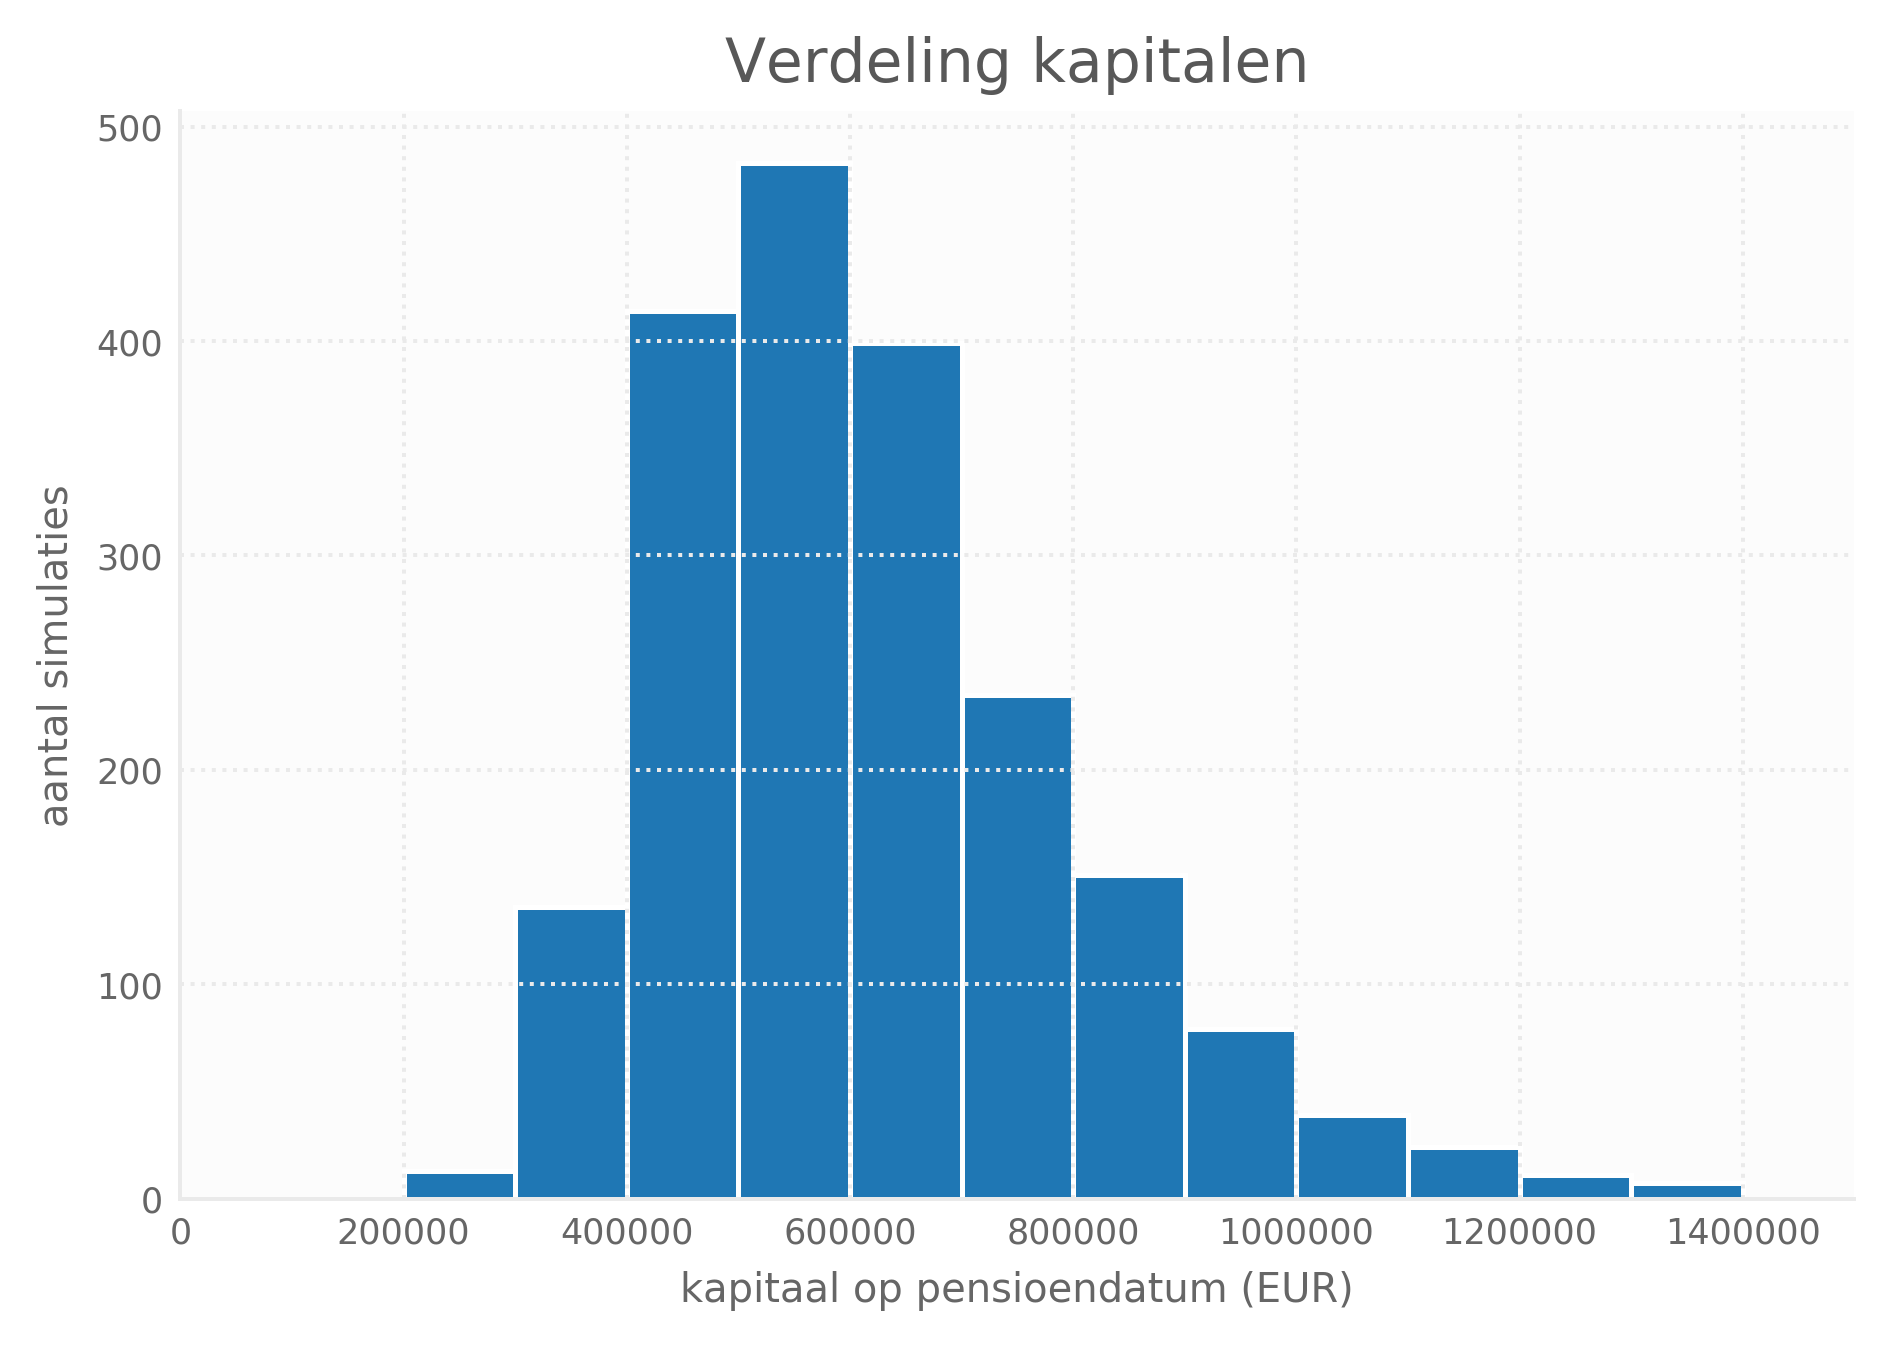

In [5]:
fig, ax = plt.subplots()
fig.set_dpi(360)
bins = np.arange(0, 1500000, 100000)
_ = ax.hist(summ.capital, bins=bins, edgecolor='white')
_ = ax.set_title('Verdeling kapitalen')
_ = ax.set_xlabel('kapitaal op pensioendatum (EUR)')
_ = ax.set_ylabel('aantal simulaties')
_ = ax.set_xlim(0, 1500000)


In [6]:
# Per scenario
NSCENARIOS = 2001
PERCENTILE = 0.17

nr = int(NSCENARIOS * PERCENTILE)

results = []

summ = summary[summary.regeling_id==3][['naam', 'simulnr', 'capital']]
grps = summ.groupby('naam')
for i, group in grps:
    ddf = group[['simulnr', 'capital']].copy()
    ddf = ddf.sort_values(by=['capital'], ascending=True)
    s = ddf.iloc[nr]
    record = pd.Series(s.append(pd.Series(data=[i], index=['naam'])))
    results.append(record.to_dict())

output = pd.DataFrame(results)[['naam', 'simulnr', 'capital']]
output.set_index('naam', inplace=True)
output['simulnr'] = output.simulnr.map(lambda x: int(round(x, 0)))
output['capital'] = output.capital.map(lambda x: int(round(x, 0)))
output

,simulnr,capital
naam,,
maatmens_A1,246,743084
maatmens_A2,246,1268249
maatmens_A3,824,1794462
maatmens_B1,353,258416
maatmens_B2,353,455261
maatmens_B3,353,652107
maatmens_C1,588,71777
maatmens_C2,588,126452
maatmens_C3,588,181127


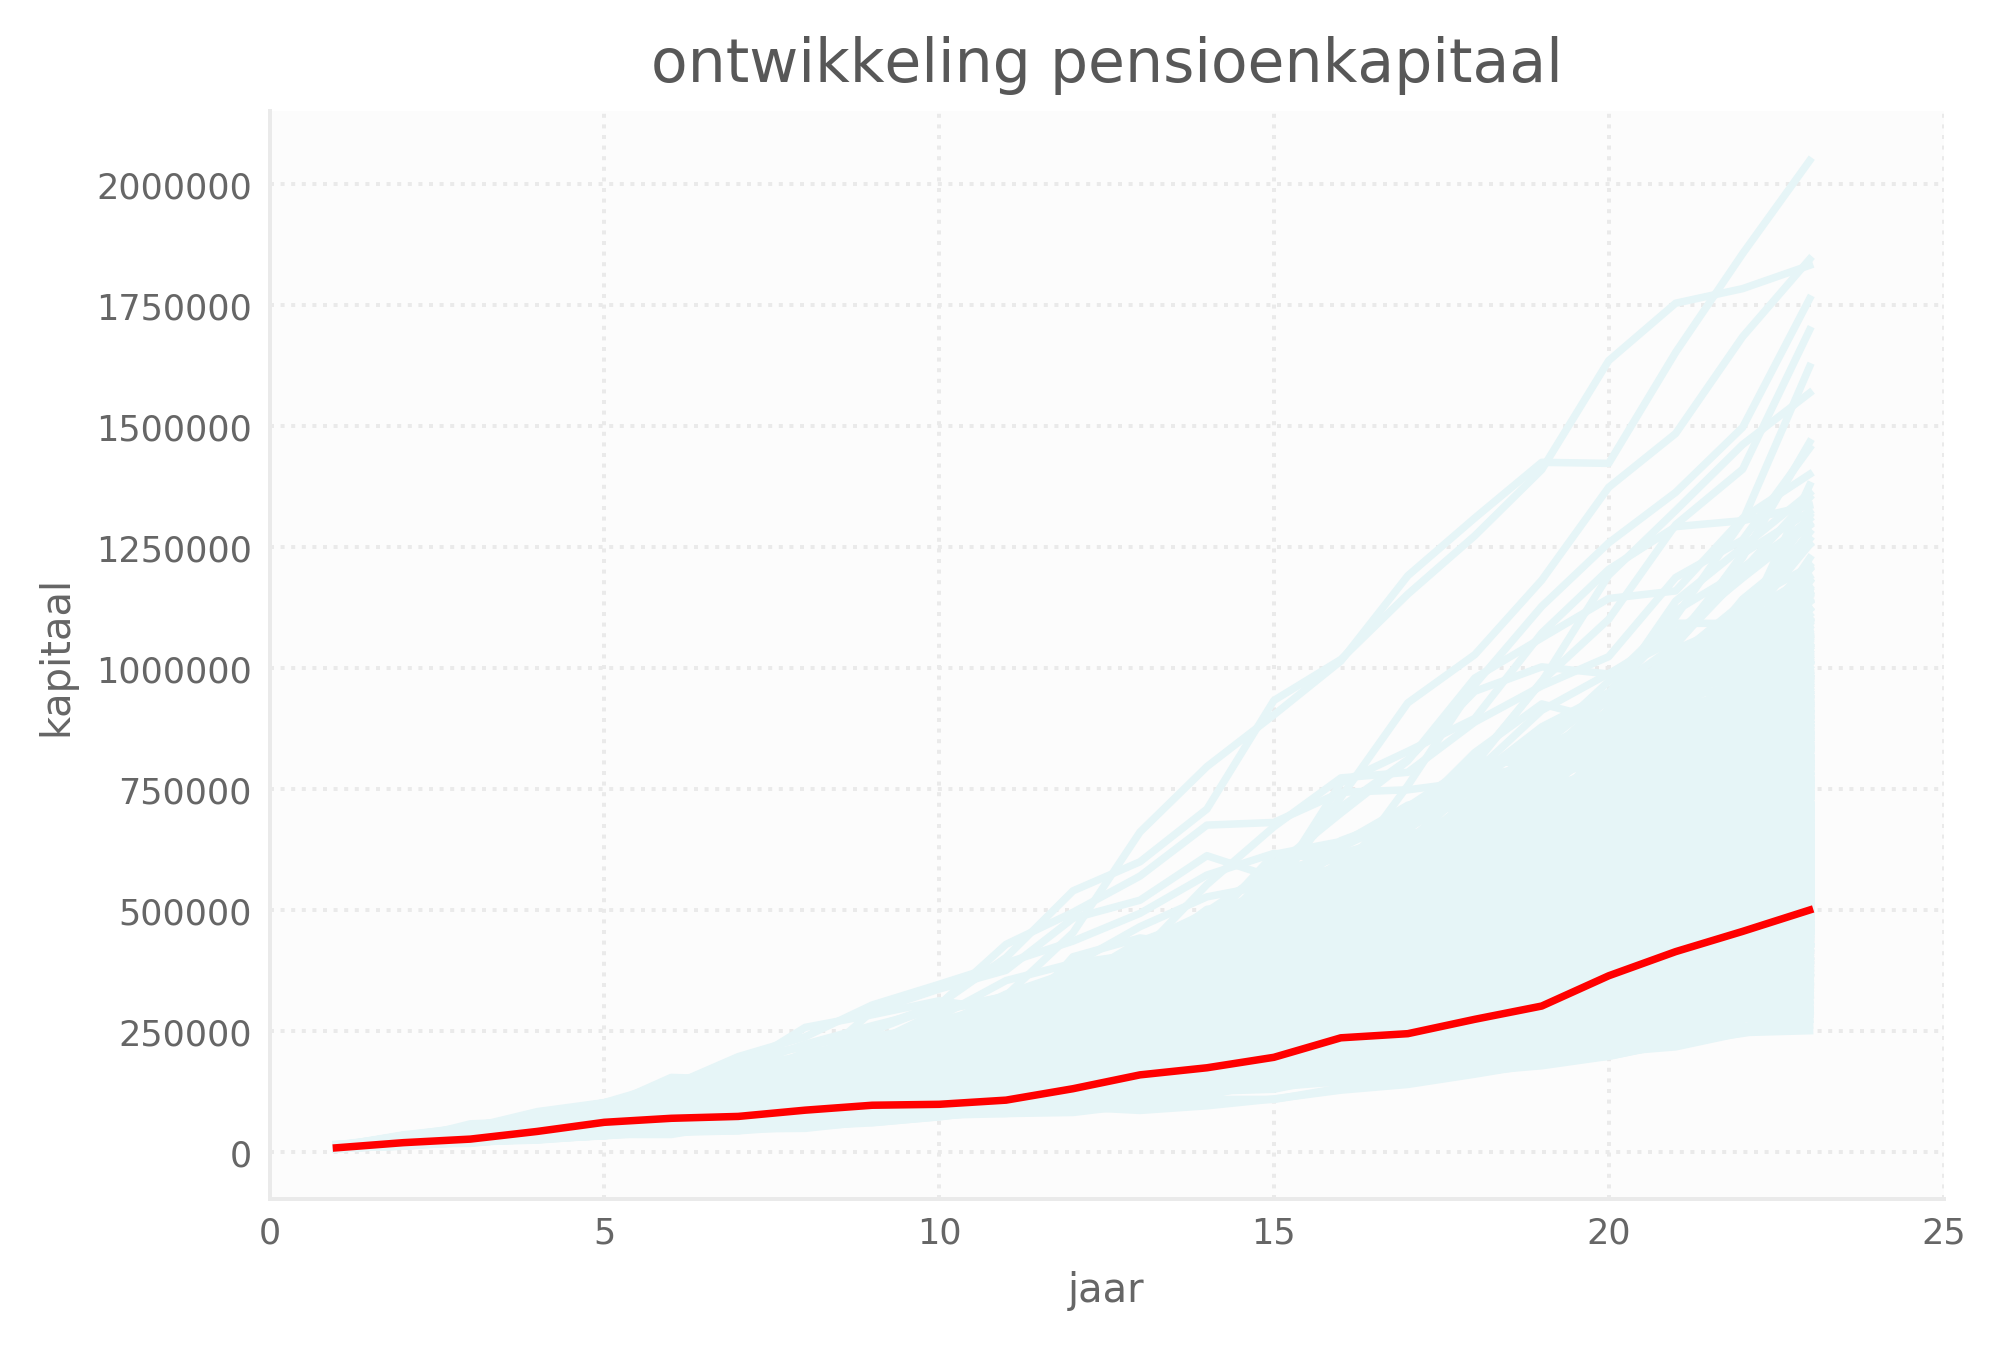

In [7]:
# plot x% slechtste scenario

fig, ax = plt.subplots()
fig.set_dpi(360)
_ = ax.plot(toplot, color='#e6f5f7')
_ = ax.set_title('ontwikkeling pensioenkapitaal')
_ = ax.set_xlabel('jaar')
_ = ax.set_ylabel('kapitaal')
_ = ax.set_xlim(0, 25)

simulnr = output.simulnr.iloc[0]
_ = ax.plot(toplot[simulnr], color='red')